<a href="https://colab.research.google.com/github/whoiswelliton/Undergraduate_Thesis/blob/main/Automatic_Musical_Instrument_Classification_using_Multivariate_Time_Series_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
- *The content in this notebook was developed by Welliton Leal (welliton@alunos.utfpr.edu.br).*

- *All the code and notes are provided under a Creative Commons ShareAlike license. Official Copyright Rules / Restrictions / Priveleges Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) https://creativecommons.org/licenses/by-sa/4.0/*
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
#**UTILS**

- ## *Paths*

In [ ]:
PATH = {
    'LIBRARIES': '/content/drive/MyDrive/#TCC/Libraries/',
    'DATABASE': '/content/drive/MyDrive/#TCC/#Database/',
    'DATASETS': '/content/drive/MyDrive/#TCC/#Datasets/',
    'MODELS': '/content/drive/MyDrive/#TCC/#Models/',
    'IMAGES': '/content/drive/MyDrive/#TCC/#Images/',
    'PACKAGES': 'lib/python3.7/site-packages',
}

In [ ]:
TINYSOL = {
    'HORN': ['Brass/Horn/Normal (Sustain)/Horn - Sustain - TinySOL'],
    'TROMBONE': ['Brass/Trombone/Normal (Sustain)/Trombone - Sustain - TinySOL'],
    'TRUMPET': ['Brass/Trumpet/Normal (Sustain)/Trumpet - Sustain - TinySOL'],
    'TUBA': ['Brass/Tuba/Normal (Sustain)/Tuba - Sustain - TinySOL'],
    'CELLO': ['Strings/Cello/Vibrato (Sustain)/Cello - Vibrato - TinySOL'],
    'DOUBLEBASS': ['Strings/Double Bass (Contrabass)/Normal (Sustain)/Double Bass - Sustain - TinySOL'],
    'VIOLA': ['Strings/Viola/Vibrato (Sustain)/Viola - Vibrato - TinySOL'],
    'VIOLIN': ['Strings/Violin/Vibrato (Sustain)/Violin - Vibrato - TinySOL'],
    'BASSOON': ['Winds/Bassoon/Normal (Sustain)/Bassoon - Sustain - TinySOL'],
    'CLARINET': ['Winds/Clarinet/Normal (Sustain)/Bb Clarinet - Sustain - TinySOL'],
    'FLUTE': ['Winds/Flute/Normal (Sustain)/Flute - Sustain - TinySOL'],
    'OBOE': ['Winds/Oboe/Normal (Sustain)/Oboe - Sustain - TinySOL'],
    'SAX': ['Winds/Saxophone/Normal (Sustain)/Alto Sax - Sustain - TinySOL'],
    #'ACCORDION': ['Keyboards/Accordion/Accordion - TinySOL'],
}

In [ ]:
ALPINE = {
    'HORN': ['Brass/Horn/Normal (Sustain)/Horn - Sustain - Alphine'],
    'TROMBONE': ['Brass/Trombone/Normal (Sustain)/Bass Trombone - Sustain - Alphine'],
                 #'Brass/Trombone/Mute (Sustain)'],
    'TRUMPET': ['Brass/Trumpet/Normal (Sustain)/Trumpet - Sustain - Alphine'],
                #'Brass/Trumpet/Mute (Sustain)/Trumpet - Harmon Mute - Alphine',
                #'Brass/Trumpet/Mute (Sustain)/Trumpet - Straigth Mute - Alphine'],
    'TUBA': ['Brass/Tuba/Normal (Sustain)/Tuba - Sustain - Alphine'], 
             #'Brass/Tuba/Mute (Sustain)/Tuba - Straight Mute - Alphine'],
    'CELLO': ['Strings/Cello/Normal (Sustain)/Cello - Sustain - Alphine'],
    'DOUBLEBASS': ['Strings/Double Bass (Contrabass)/Normal (Sustain)/Double Bass - Sustain - Alphine'],
    'VIOLA': ['Strings/Viola/Vibrato (Sustain)/Viola - Vibrato - Alphine', 
              'Strings/Viola/Normal (Sustain)/Viola - Sustain - Alphine'],
    'VIOLIN': ['Strings/Violin/Vibrato (Sustain)/Violin - Vibrato - Alphine',
               'Strings/Violin/Normal (Sustain)/Violin - Sustain - Alphine'],
    'BASSOON': ['Winds/Bassoon/Normal (Short)/Bassoon - Short - Alphine'],
    'CLARINET': ['Winds/Clarinet/Normal (Sustain)/Bass Clarinet - Sustain - Alphine',
                 'Winds/Clarinet/Normal (Sustain)/Bb Clarinet - Sustain - Alphine',
                 'Winds/Clarinet/Normal (Sustain)/Eb Clarinet - Sustain - Alphine'],
    'FLUTE': ['Winds/Flute/Normal (Sustain)/Flute - Sustain - Alphine',
              'Winds/Flute/Vibrato (Sustain)/Flute - Vibrato - Alphine'],
    'OBOE': ['Winds/Oboe/Vibrato (Sustain)/Oboe - Vibrato - Alphine'],
    'SAX': ['Winds/Saxophone/Normal (Sustain)/Alto Sax - Sustain - Alphine'],
    #'PICCOLO': ['Winds/Piccolo/Normal (Sustain)/Piccolo - Sustain - Alphine'],
}

- ## *Virtual Environments*

In [ ]:
import os, gc, sys, random, time
from os import path as os_path

In [ ]:
virtual_envs = [
    #'librosa_env',
    'sktime_env/',
    'tslearn_env/',
    'joblib_env/',
]

In [ ]:
for env_name in virtual_envs: 
    sys.path.append(PATH['LIBRARIES'] + env_name + PATH['PACKAGES'])

del(virtual_envs)
print(sys.path)

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/#TCC/Libraries/essentia_env/lib/python3.7/site-packages', '/content/drive/MyDrive/#TCC/Libraries/sktime_env/lib/python3.7/site-packages', '/content/drive/MyDrive/#TCC/Libraries/tslearn_env/lib/python3.7/site-packages', '/content/drive/MyDrive/#TCC/Libraries/joblib_env/lib/python3.7/site-packages']


- ## *Libraries* 

- **Utils**

> - numpy: https://numpy.org/doc/stable/
> - pandas: https://pandas.pydata.org/docs/
> - pickle: https://docs.python.org/3/library/pickle.html
> - psutil: https://github.com/giampaolo/psutil
> - tracemalloc: https://docs.python.org/3/library/tracemalloc.html

In [ ]:
import numpy as np
import pandas as pd
import pickle as pkl
import psutil as utl
import tracemalloc


print("numpy: " + np.__version__)
print("pandas: " + pd.__version__)

numpy: 1.21.6
pandas: 1.3.5


- **Audio & Signals**

> - librosa: https://librosa.org/doc/main/index.html

In [ ]:
import librosa
import librosa.display
print("librosa: " + librosa.__version__)

librosa: 0.8.1


- **Time Series & Machine Learning**

> - sktime: https://www.sktime.org/en/stable/
> - tslearn: https://tslearn.readthedocs.io/en/stable/index.html
> - sklearn: https://scikit-learn.org/stable/

In [ ]:
import sktime
import tslearn
import sklearn
print("sktime: " + sktime.__version__)
print("tslearn: " + tslearn.__version__)
print("sklearn: " + sklearn.__version__)

sktime: 0.8.0
tslearn: 0.5.2
sklearn: 1.0.2


In [ ]:
from tslearn.utils import from_sktime_dataset, to_sktime_dataset
from tensorflow.keras.optimizers import Adam
from sktime.utils.data_io import(
    load_from_tsfile_to_dataframe,
    write_dataframe_to_tsfile)
from sktime.datatypes._panel._convert import(
    from_2d_array_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe)

In [ ]:
from sklearn.pipeline import Pipeline
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.transformations.panel.compose import ColumnConcatenator
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score, roc_curve)

In [ ]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from tslearn.svm import TimeSeriesSVC
from tslearn.shapelets import LearningShapelets, grabocka_params_to_shapelet_size_dict

- **Visualization**

> - matplotlib: https://matplotlib.org/
> - seaborn: https://seaborn.pydata.org/

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print("matplotlib: " + plt.__version__)
print("seaborn: " + sns.__version__)

matplotlib: 3.2.2
seaborn: 0.11.2


---
#**FUNCTIONS**

##*Functions 01* - **RAW Audio Data**

- librosa.util.find_files = Get a sorted list of (audio) files in a directory or directory sub-tree.

In [ ]:
def load_wav_paths(path):
    '''
        Get a sorted list of audio (wav) files in a directory or directory sub-tree
    '''
    load_files = []
    load_files = librosa.util.find_files(
        path, 
        ext = 'wav', 
        recurse = True)
    
    print(f"Found {len(load_files)} WAV Files")
    return load_files

- librosa.load = Load an audio file as a floating point time series.
- es.MonoLoader = the MonoLoader will downmix the file to a mono signal and resample it to the given sample rate.

In [ ]:
def librosa_load(files):
    '''
        Load an audio file as a floating point time series.
        Audio will be automatically resampled to the given rate of 44100.
    '''
    data = []
    for p in files:

        audio_series, sr = librosa.load(
            path = p, 
            sr = SAMPLE_RATE, 
            mono = True,
            dtype = np.float32,
            duration = LENGHT_LIMIT/2)
        
        audio_series = np.asarray(audio_series)
        duration = get_durations([audio_series])

        if duration[0] < LENGHT_LIMIT:

            audio_series = np.asarray(fix_audio_lenght([audio_series])[0])
            audio_series = np.nan_to_num(audio_series, nan = 0)

        audio_series = audio_series.astype(dtype = np.float32)
        data.append(audio_series)

    print(f'{len(data)} Samples Loaded')  
    return data

In [ ]:
def get_instruments_data(INSTRUMENTS):

    data = []
    print(f"Loading Parameters: SAMPLE RATE: {SAMPLE_RATE}")
    
    FILEPATH = f'{PATH["DATASETS"]}Raw/{DATABASE_NAME}/SR{SAMPLE_RATE}/'
    if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

    for name, paths in INSTRUMENTS.items():

        files = []

        FILENAME = f'data_{name}_{LENGHT_LIMIT}_{SAMPLE_RATE}'
        for pth in paths:
            print(f'{pth}')
            files += load_wav_paths(PATH["DATABASE"] + pth)

        print(f'{len(files)} {name} Files Loaded ')
        data = librosa_load(files)
        
        pkl.dump(data, open(f"{FILEPATH}{FILENAME}.pickle",'wb'))
        gc.collect()

    del(data)
    del(files)
    #return(output_array)

In [ ]:
def load_instruments_data(PATH_INSTRUMENTS):

    print(f"Loading Parameters: SAMPLE RATE: {SAMPLE_RATE}")
    
    output_array = []

    for INSTR_name in PATH_INSTRUMENTS.keys():
        print(f'{INSTR_name} Data Loaded')

        #raw
        data = {f'{INSTR_name}': pkl.load(
            open(f"{PATH['DATASETS']}Raw/{DATABASE_NAME}/SR{SAMPLE_RATE}/data_{INSTR_name}_{LENGHT_LIMIT}_{SAMPLE_RATE}.pickle",'rb'))}

        output_array.append(data)
        gc.collect()

    del(data)
    return(output_array)

In [ ]:
def get_durations(data):
    
    durations = []
    for x in data:
        D = librosa.get_duration(
            y = x)#, sr = SAMPLE_RATE)
        durations.append(D)

    return durations

In [ ]:
def fix_audio_lenght(data):

    fixed = []
    for d in data:

        fixed_series = librosa.util.fix_length(d, 
                size = int((LENGHT_LIMIT*44100)/2),
                #dtype = np.float32, 
                mode = "constant",
                constant_values = (0.001))

        fixed.append(np.asarray(fixed_series))
    
    return(fixed)

##*Functions 02* - **Temporal Features Extraction** [Time Domain]

- **Amplitude Envelope**

> Compute the max value for each frame from the audio samples

In [ ]:
def extract_amplitude_envelope(waveform):
    AMP = []
    
    for W in waveform:
        
        amp_ft = np.array([max(W[i:i+FRAME_SIZE]) for i in range(0, len(W), HOP_LENGTH)])
        AMP.append(amp_ft)

    del(amp_ft)
    gc.collect()
    return(AMP)

- **Root-Mean Square**

> Compute root-mean-square value for each frame, either from the audio samples y or from a spectrogram S.

In [ ]:
def extract_root_mean_square(waveform):
    RMS = [] #threshold default = 1e-10

    for W in waveform:
      
        rms_ft = np.ndarray.flatten(librosa.feature.rms(W, frame_length = FRAME_SIZE , hop_length = HOP_LENGTH))
        RMS.append(rms_ft)

    del(rms_ft)
    gc.collect()
    return(RMS)

- **Zero-Crossing Rate**

> Compute the zero-crossing rate of an audio time series.

In [ ]:
def extract_zero_crossing_rate(waveform):
    ZCR = []

    for W in waveform:
   
        zcr_ft = np.ndarray.flatten(librosa.feature.zero_crossing_rate(W, threshold=0.0005, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH))
        ZCR.append(zcr_ft)
    
    del(zcr_ft)
    gc.collect()
    return (ZCR)

##*Functions 03* - **Spectral Features Extraction** [Frequency Domain]

In [ ]:
def extract_spectrogram(audiodata):
    #phases = []
    mag_spectrogram = []
    complex_spectrogram = []
    log_spectrogram = []

    for x in audiodata:

        stft = librosa.stft(x, n_fft = FRAME_SIZE, hop_length = HOP_LENGTH) #D
        #mag, phs = librosa.magphase(D = stft, power = 2)  #1 for energy, 2 for power
        mag = np.abs(stft, dtype = np.float64)**2
        log_mag = librosa.power_to_db(mag)
        
        complex_spectrogram.append(stft)
        log_spectrogram.append(log_mag)
        mag_spectrogram.append(mag)
        #phases.append(phs)

    return mag_spectrogram, log_spectrogram, complex_spectrogram

In [ ]:
def extract_band_energy_ratio(audiodata):

    i = 0
    BER = []
    split_frequency = 2048          #Arbitrary
    frequency_range = SAMPLE_RATE/2 #Nyquist Frequency

    for x in audiodata:

        band_energy_ratio = []
        
        stft = librosa.stft(y = x, hop_length = HOP_LENGTH, n_fft = FRAME_SIZE)
        mag = np.abs(stft, dtype = np.float64)**2
        power_spec = mag.T #Traspose
        del(mag)

        frequency_delta_per_bin = frequency_range / stft.shape[0] 
        split_frequency_bin = int(np.floor(split_frequency / frequency_delta_per_bin).astype(np.int64))
        del(stft)

        #BER for each frame
        for frequencies_in_frame in power_spec:

            sum_power_low_freq = np.sum(frequencies_in_frame[:split_frequency_bin], dtype = np.float64)
            sum_power_high_freq = np.sum(frequencies_in_frame[split_frequency_bin:], dtype = np.float64)

            BER_current_frame = sum_power_low_freq / sum_power_high_freq
            band_energy_ratio.append(BER_current_frame)
        
        band_energy_ratio = np.asarray(band_energy_ratio, dtype = np.float64)
        band_energy_ratio = np.nan_to_num(band_energy_ratio, nan = band_energy_ratio.mean(dtype = np.float64))
        BER.append(band_energy_ratio)

    return BER

In [ ]:
def extract_spectral_centroid(mag_spectrogram):
    spct_centroid = []
  
    for S in mag_spectrogram:

        spc_cntrd =  np.ndarray.flatten(librosa.feature.spectral_centroid(S = S, sr = SAMPLE_RATE, n_fft = FRAME_SIZE, hop_length = HOP_LENGTH))
        spct_centroid.append(spc_cntrd)
    
    return spct_centroid

In [ ]:
def extract_spectral_bandwidth(mag_spectrogram):
    spct_bandwidth = []

    for S in mag_spectrogram:

        #spc_cntrd =  np.ndarray.flatten(librosa.feature.spectral_centroid(S = S, sr = SAMPLE_RATE, n_fft = FRAME_SIZE, hop_length = HOP_LENGTH))
        spc_bw = np.ndarray.flatten(librosa.feature.spectral_bandwidth (S = S,sr = SAMPLE_RATE, n_fft = FRAME_SIZE, hop_length = HOP_LENGTH))
        spct_bandwidth.append(spc_bw)

    return spct_bandwidth

##*Functions 04* - **Composed Feature Extraction**

In [ ]:
def extract_all_features(data_INSTR):
    
    all_features = []

    #TEMPORAL FEATURES
    amp_INSTR = []
    amp_INSTR = extract_amplitude_envelope(
        data_INSTR)
    all_features.append(amp_INSTR)
    del(amp_INSTR)

    rms_INSTR = []
    rms_INSTR = extract_root_mean_square(
        data_INSTR)
    all_features.append(rms_INSTR)
    del(rms_INSTR)

    zcr_INSTR = []
    zcr_INSTR = extract_zero_crossing_rate(
        data_INSTR)
    all_features.append(zcr_INSTR)
    del(zcr_INSTR)

    #SPECTROGRAM
    mag_spec_INSTR = [] 
    mag_spec_INSTR, log_spectrogram, complex_spectrogram = extract_spectrogram(data_INSTR)

    #SPECTRAL FEATURES
    ber_INSTR = []
    ber_INSTR = extract_band_energy_ratio(data_INSTR)
    all_features.append(ber_INSTR)
    del(ber_INSTR)
    
    bndw_INSTR = []
    bndw_INSTR = extract_spectral_bandwidth(mag_spec_INSTR)
    all_features.append(bndw_INSTR)
    del(bndw_INSTR)
    
    cntrd_INSTR = []
    cntrd_INSTR =  extract_spectral_centroid(mag_spec_INSTR)
    all_features.append(cntrd_INSTR)
    del(cntrd_INSTR)

    return(all_features)

In [ ]:
def extract_temporal_features(data_INSTR):
    
    time_features = []

    #TEMPORAL FEATURES
    amp_INSTR = []
    amp_INSTR = extract_amplitude_envelope(
        data_INSTR, FRAME_SIZE, HOP_LENGTH)
    time_features.append(amp_INSTR)
    del(amp_INSTR)

    rms_INSTR = []
    rms_INSTR = extract_root_mean_square(
        data_INSTR, FRAME_SIZE, HOP_LENGTH)
    time_features.append(rms_INSTR)
    del(rms_INSTR)

    zcr_INSTR = []
    zcr_INSTR = extract_zero_crossing_rate(
        data_INSTR, FRAME_SIZE, HOP_LENGTH)
    time_features.append(zcr_INSTR)
    del(zcr_INSTR)

    return(time_features)

In [ ]:
def extract_spectral_features(data_INSTR):
    
    spec_features = []

     #SPECTROGRAM
    mag_spec_INSTR = []
    mag_spec_INSTR = extract_spectrogram(
        data_INSTR, SAMPLE_RATE, FRAME_SIZE, HOP_LENGTH)

    #SPECTRAL FEATURES
    ber_INSTR = []
    ber_INSTR = extract_band_energy_ratio(
        data_INSTR, SAMPLE_RATE, HOP_LENGTH, FRAME_SIZE)
    spec_features.append(ber_INSTR)
    del(ber_INSTR)
    
    bndw_INSTR = []
    bndw_INSTR = extract_spectral_bandwidth(
        mag_spec_INSTR, SAMPLE_RATE, FRAME_SIZE, HOP_LENGTH)
    spec_features.append(bndw_INSTR)
    del(bndw_INSTR)
    
    cntrd_INSTR = []
    cntrd_INSTR =  extract_spectral_centroid(
        mag_spec_INSTR, SAMPLE_RATE, FRAME_SIZE, HOP_LENGTH)
    spec_features.append(cntrd_INSTR)
    del(cntrd_INSTR)

    return(spec_features)

In [ ]:
def feature_extraction(data_INSTRUMENTS):

    print(f"Extraction Parameters: \
        AUDIO LENGHT - {LENGHT_LIMIT} - FRAME SIZE: {FRAME_SIZE} - HOP LENGHT {HOP_LENGTH}")

    output_list = []
    df_output = pd.DataFrame()

    for INSTR_dict in data_INSTRUMENTS:

        for INSTR_name, INSTR_data in INSTR_dict.items():
      
            if FEATURES_TYPE == 'All':
                features = extract_all_features(INSTR_data)
            elif FEATURES_TYPE == 'Temporal':
                features = extract_temporal_features(INSTR_data)
            elif FEATURES_TYPE == 'Spectral':
                features = extract_spectral_features(INSTR_data)

            dataframe, labels = instrument_features_to_dataframe(features, INSTR_name)
            del(features)

            df_column = pd.concat([dataframe, pd.DataFrame({'LABELS': labels})], axis = 1)
            del(dataframe)

        df_output = pd.concat([df_output, df_column], axis = 0, ignore_index = True)
        print(f"{INSTR_name} Features Extraction Completed")
        del(df_column)

    return(df_output)

##*Functions 05* - **Dataset Preparation**

In [ ]:
def instrument_features_to_dataframe(features, instrument):
    
    FILEPATH = f"{PATH['DATASETS']}Instruments/{LENGTH_TYPE}/{DATABASE_NAME}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}"
    FILENAME = f"df_{instrument}_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_{FEATURES_TYPE}_features"
    if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

    label = [f'{instrument}']
    all_labels = np.asarray([label[0] for i in range(0, len(features[0]))])
 
    #verifica df com mais colunas
    max = 1
    for ft_series in features:
        df_atual = pd.DataFrame(ft_series)
        atual = len(df_atual.columns)
        if atual > max: max = atual
  
    df_final = pd.DataFrame()

    for ft_series in features:
        
        df_atual = pd.DataFrame(ft_series)
        #enquanto menor que maior df, adiciona coluna de zero
        while len(df_atual.columns) < max:
            df_atual[f'{len(df_atual.columns)}'] = 0.0

        #se tiver NaN, substitui por zero
        df_atual = df_atual.fillna(0)
        #converte para o formato aninhado e concatena
        df_nested = from_2d_array_to_nested(df_atual, cells_as_numpy = False)
        df_final = pd.concat([df_final, df_nested], axis = 1)
    
    del(df_atual)
    del(df_nested)

    cols_list = ['AMP','RMS','ZCR','BER','BNDW','CNTRD']
    if FEATURES_TYPE == 'All': 
        df_final.columns = cols_list
    elif FEATURES_TYPE == 'Temporal': 
        df_final.columns = cols_list[0:3]
    elif FEATURES_TYPE == 'Spectral': 
        df_final.columns = cols_list[3:6]
    
    write_dataframe_to_tsfile(
        df_final, 
        FILEPATH,
        problem_name = FILENAME,
        class_label = label,
        class_value_list = all_labels)
    
    return(df_final, all_labels)

In [ ]:
def get_equal_size_df_columns(df):

    for j in range(0, len(df.columns)):

        lenghts = []
        for i in range(0, len(df)):
            lenghts.append(len(df.iloc[i,j]))
        
        sizes = np.unique(lenghts)
        del(lenghts)
        if len(sizes) > 1: max = np.amax(sizes)
        else: max = sizes[0]

        for i in range(0, len(df)):

            if len(df.iloc[i,j]) < max:

                size_missing = max - len(df.iloc[i,j])
                missing = pd.Series([0.0]*size_missing)
                df.iloc[i,j] = df.iloc[i,j].append(
                    missing, ignore_index = True)
                
    return df

In [ ]:
def normalize(df):

    df_temp = df.copy()
    qtd_cols = len(df_temp.columns) -1
    df_temp.columns = [f'dim_{N}' for N in range(0, qtd_cols)] + ['class_vals']

    df_test_3d = from_sktime_dataset(df_temp)
    normalized = TimeSeriesScalerMinMax(value_range = (0.0, 1.0)).fit_transform(df_test_3d)
    df_normalized = to_sktime_dataset(normalized)

    df_normalized['LABELS'] = df['LABELS']
    df_normalized.columns = df.columns

    return(df_normalized)

In [ ]:
def dataset_preparation(df_input):

    FILEPATH = f"{PATH['DATASETS']}Datasets/{DATABASE_NAME}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}/"
    FILENAME = f"{FEATURES_TYPE}_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}_dataset"
    
    qtd_cols = len(df_input.columns) -1
    df_treated = get_equal_size_df_columns(df_input.iloc[:,0: qtd_cols])
    df_treated = pd.concat([df_treated, df_input['LABELS']], axis = 1)

    if NORMALIZED == True:
        train_name = f"X_y_train_Norm_{FILENAME}"
        test_name = f"X_y_test_Norm_{FILENAME}"
        df_treated = normalize(df_treated)

    else:
        train_name = f"X_y_train_{FILENAME}"
        test_name = f"X_y_test_{FILENAME}"
    
    if (ML_CLASSIFIER == 'KNN'):

        X_train, X_test, y_train, y_test = train_test_split(
            df_treated.iloc[:,0: qtd_cols], 
            df_treated['LABELS'], 
            test_size = TEST_SIZE, 
            random_state = 42, 
            stratify = df_treated['LABELS'])
        print("Nested Dataframe Splited")

        if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

        write_dataframe_to_tsfile(
            X_train, 
            FILEPATH,
            problem_name = train_name,
            class_label = y_train.unique(),
            class_value_list = y_train)
        
        write_dataframe_to_tsfile(
            X_test, 
            FILEPATH,
            problem_name = test_name,
            class_label = y_test.unique(),
            class_value_list = y_test)
        print("Nested Dataframe Stored")

    elif (ML_CLASSIFIER == 'SVM'):

        df_treated.columns = [f'dim_{N}' for N in range(0, qtd_cols)] + ['class_vals']

        arr_labels = np.asarray(df_treated['class_vals'])
        arr_3D_treated = from_sktime_dataset(df_treated.iloc[:,0: qtd_cols])
        
        X_train, X_test, y_train, y_test = train_test_split(
            arr_3D_treated,
            arr_labels,
            test_size = TEST_SIZE, 
            random_state = 42, 
            stratify = arr_labels)
        print("3D Array List Splited")

        if os_path.exists(FILEPATH + train_name) == False: os.mkdir(FILEPATH + train_name)
        if os_path.exists(FILEPATH + test_name) == False: os.mkdir(FILEPATH + test_name)

        pkl.dump(
            dict(X_train = X_train, y_train = y_train), 
            open(f"{FILEPATH}{train_name}/{train_name}.pickle",'wb'))
        pkl.dump(
            dict(X_test = X_test, y_test = y_test), 
            open(f"{FILEPATH}{test_name}/{test_name}.pickle",'wb'))
        print("3D Array List Stored")

    output_dict = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
    }

    return(output_dict)

In [ ]:
def load_features_dataset():

    FILEPATH = f"{PATH['DATASETS']}Datasets/{DATABASE_NAME}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}"
    FILENAME = f"{FEATURES_TYPE}_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}_dataset"
    
    if NORMALIZED == True:
        train_name = f"X_y_train_Norm_{FILENAME}"
        test_name = f"X_y_test_Norm_{FILENAME}"
    else:
        train_name = f"X_y_train_{FILENAME}"
        test_name = f"X_y_test_{FILENAME}"

    if (ML_CLASSIFIER == 'KNN'):

        X_train, y_train = load_from_tsfile_to_dataframe(
            f'{FILEPATH}/{train_name}/{train_name}.ts',
                return_separate_X_and_y = True)
        X_test, y_test = load_from_tsfile_to_dataframe(
            f'{FILEPATH}/{test_name}/{test_name}.ts',
                return_separate_X_and_y = True)
        
    elif (ML_CLASSIFIER == 'SVM') | (ML_CLASSIFIER == 'SHAPELET'):
        
        X_train = pkl.load(
            open(f"{FILEPATH}/{train_name}/{train_name}.pickle",'rb'))['X_train']
        y_train = pkl.load(
            open(f"{FILEPATH}/{train_name}/{train_name}.pickle",'rb'))['y_train']
        X_test = pkl.load(
            open(f"{FILEPATH}/{test_name}/{test_name}.pickle",'rb'))['X_test']
        y_test = pkl.load(
            open(f"{FILEPATH}/{test_name}/{test_name}.pickle",'rb'))['y_test']

    output_dict = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
    }
    
    print(f"Features Datasets Loaded")
    gc.collect()

    return(output_dict)

In [ ]:
def preprocessing():

    INSTRUMENTS_DATA = load_instruments_data(INSTRUMENTS)
    print("___________________________________________________")
    FEATURES_DATASET = feature_extraction(INSTRUMENTS_DATA)
    print(FEATURES_DATASET.keys())
    print("___________________________________________________")
    INPUT = dataset_preparation(FEATURES_DATASET)
    print(INPUT.keys())
    print("___________________________________________________")

    return INPUT

##*Functions 06* - **Machine Learning Models**

In [ ]:
def performance(state, *args):

    if state == True:
        tracemalloc.stop()
        tracemalloc.start()
        peak = 0

        out = pd.DataFrame({
                'time': [time.time()],
                'mem_peak (MB)': [peak*1024],
                'mem_used (MB)': [(utl.virtual_memory().used)/1024**2],
                'mem_perc (%)': [utl.virtual_memory().percent],
                'disk_used (MB)': [(utl.disk_usage('/').used)/1024**2],
                'disk_perc (%)': [utl.disk_usage('/').percent],
                'cpu (%)': [utl.cpu_percent(interval=1)],
        })
    
    else:
        first_size, first_peak = tracemalloc.get_traced_memory()
        peak = first_peak/1024**3

        end = pd.DataFrame({
                'time': [time.time()],
                'mem_peak (MB)': [peak*1024],
                'mem_used (MB)': [(utl.virtual_memory().used)/1024**2],
                'mem_perc (%)': [utl.virtual_memory().percent],
                'disk_used (MB)': [(utl.disk_usage('/').used)/1024**2],
                'disk_perc (%)': [utl.disk_usage('/').percent],
                'cpu (%)': [utl.cpu_percent(interval=1)],
        })
        out = end - args[0]

        print()

        FILEPATH = f'{PATH["MODELS"]}{LENGTH_TYPE}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}/'
        if NORMALIZED == True:FILENAME = f'multi_{ML_CLASSIFIER}_Norm_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'
        else: FILENAME = f'multi_{ML_CLASSIFIER}_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'
        out.to_csv(FILEPATH + FILENAME + f"/{FILENAME}_pred_performance.csv", encoding = "utf-8")
        print('Performance Metrics Saved')
    
    return(out)

In [ ]:
def model_train(model_input):

    LABELS_NAMES = INSTRUMENTS.keys()
    FILEPATH = f'{PATH["MODELS"]}{LENGTH_TYPE}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}/'
    if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

    if NORMALIZED == True: FILENAME = f'multi_{ML_CLASSIFIER}_Norm_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'   
    else: FILENAME = f'multi_{ML_CLASSIFIER}_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'

    full_path = FILEPATH + FILENAME + "/"
    if os_path.exists(full_path) == False: os.mkdir(full_path)

    print(f"{ML_CLASSIFIER} Model Train Started")

    #selecting algorithm
    if ML_CLASSIFIER == 'KNN':
        TSC = KNeighborsTimeSeriesClassifier(n_neighbors = 1, distance = "dtw")

    elif ML_CLASSIFIER == 'SVM':
        TSC = TimeSeriesSVC(kernel = "gak", gamma = "auto", n_jobs = 2)
    
    print("Model Fit")
    #fitting the model
    TSC.fit(model_input['X_train'], model_input['y_train'])
    
    #saving model  
    pkl.dump(TSC, open(f"{full_path}{FILENAME}_model.pkl",'wb'))
    print(f"Model Saved")

    return(TSC)

In [ ]:
def model_test(TSC_model, model_input):

    LABELS_NAMES = INSTRUMENTS.keys()
    FILEPATH = f'{PATH["MODELS"]}{LENGTH_TYPE}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}/'
    if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

    if NORMALIZED == True: FILENAME = f'multi_{ML_CLASSIFIER}_Norm_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'   
    else: FILENAME = f'multi_{ML_CLASSIFIER}_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'

    full_path = FILEPATH + FILENAME + "/"
    if os_path.exists(full_path) == False: os.mkdir(full_path)

    print(f"Time Series Classification with {ML_CLASSIFIER}")

    print("Model Predict")
    #predicting the outputs and recording the performance
    start = performance(True)
    y_pred_TSC = TSC_model.predict(model_input['X_test'])
    end = performance(False, start)

    #saving pred  
    pkl.dump(y_pred_TSC, open(full_path + FILENAME + "_pred.pkl",'wb'))
    print(f"Prediction Saved")

    return(y_pred_TSC)

In [ ]:
def model_evaluate(model_input, prediction):
        
    LABELS = INSTRUMENTS.keys()
    FILEPATH = f'{PATH["MODELS"]}{LENGTH_TYPE}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}/'
    if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

    if NORMALIZED == True: FILENAME = f'multi_{ML_CLASSIFIER}_Norm_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'   
    else: FILENAME = f'multi_{ML_CLASSIFIER}_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'

    full_path = FILEPATH + FILENAME + "/"
    if os_path.exists(full_path) == False: os.mkdir(full_path)

    #generating score
    print(f"Model Accuracy: {accuracy_score(model_input['y_test'], prediction)}")  

   #Model Report
    Report = classification_report(
        model_input['y_test'], prediction, 
        target_names = LABELS,
        output_dict = True)
    Report = pd.DataFrame(Report).transpose()
    Report.to_csv(full_path + FILENAME + "_report.csv", encoding = "utf-8")
    print("Classification Report Generated")

    #Confusion Matrix
    Confusion_Matrix = confusion_matrix(model_input['y_test'], prediction)
    Confusion_Matrix = (Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis = 1)[:, np.newaxis]) #normalize
    df_Confusion_Matrix = pd.DataFrame(
        Confusion_Matrix, 
        index = LABELS, 
        columns = LABELS)
    df_Confusion_Matrix.to_csv(
        full_path + FILENAME + "_cmatrix.csv", 
        encoding = "utf-8")
    print("Confusion Matrix Generated")

    title =  f'{ML_CLASSIFIER} Time Series Classifier with {FEATURES_TYPE} Features'
    CM_img = plot_confusion_matrix_SEABORN('',
        Confusion_Matrix, LABELS, 'coolwarm', '.2%')
    save_image(CM_img, full_path, FILENAME + "_cmatrix")
    print("All Metrics Saved")


In [ ]:
def load_model():

    LABELS_NAMES = INSTRUMENTS.keys()
    FILEPATH = f'{PATH["MODELS"]}{LENGTH_TYPE}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}/'
    if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

    if NORMALIZED == True: 
        FILENAME = f'multi_{ML_CLASSIFIER}_Norm_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'
    else:
        FILENAME = f'multi_{ML_CLASSIFIER}_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'

    model = pkl.load(open(f"{FILEPATH}{FILENAME}/{FILENAME}_model.pkl",'rb'))

    print(f"{ML_CLASSIFIER} Model Loaded")

    return(model)

In [ ]:
def time_series_classifier_pipeline(model_input):

    LABELS_NAMES = INSTRUMENTS.keys()
    FILEPATH = f'{PATH["MODELS"]}{LENGTH_TYPE}/SR{SAMPLE_RATE}_FR{FRAME_SIZE}_HP{HOP_LENGTH}/'
    if os_path.exists(FILEPATH) == False: os.mkdir(FILEPATH)

    if NORMALIZED == True: FILENAME = f'multi_{ML_CLASSIFIER}_Norm_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'   
    else: FILENAME = f'multi_{ML_CLASSIFIER}_{FEATURES_TYPE}_features_{LENGTH_TYPE}_{LENGHT_LIMIT}_{DATABASE_NAME}_TS{int(TEST_SIZE*100)}'

    full_path = FILEPATH + FILENAME + "/"
    if os_path.exists(full_path) == False: os.mkdir(full_path)

    print(f"Time Series Classification with {ML_CLASSIFIER}")

    #selecting algorithm
    if ML_CLASSIFIER == 'KNN':
        TSC = KNeighborsTimeSeriesClassifier(n_neighbors = 1, distance = "dtw")

    elif ML_CLASSIFIER == 'SVM':
        TSC = TimeSeriesSVC(kernel = "gak", gamma = "auto", n_jobs = 2)
    
    #fitting the model
    TSC.fit(model_input['X_train'], model_input['y_train'])
    print("Model Fit")

    #predicting the outputs and recording the performance
    start = performance(True)
    y_pred_TSC = TSC.predict(model_input['X_test'])
    end = performance(False, start)
    print("Model Predict")

    #generating score
    print(f"Model Accuracy: {accuracy_score(model_input['y_test'], y_pred_TSC)}")  

    #saving model  
    pkl.dump(TSC, open(f"{full_path}{FILENAME}_model.pkl",'wb'))
    pkl.dump(y_pred_TSC, open(full_path + FILENAME + "_pred.pkl",'wb'))
    print(f"Model Saved")

    #generating metrics
    model_evaluate(model_input, y_pred_TSC)

    return(y_pred_TSC)

##*Functions 07* - **Data Visualization**

- ### *Utils*

In [ ]:
def save_image(fig, filepath, filename):

    fig.savefig(filepath + f"{filename}.png", dpi = fig.dpi, format = "png", transparent = True, bbox_inches ='tight')
    fig.savefig(filepath + f"{filename}.eps", dpi = fig.dpi, format = "eps", transparent = True, bbox_inches ='tight')
    fig.savefig(filepath + f"{filename}.svg", dpi = fig.dpi, format = "svg", transparent = True, bbox_inches ='tight')
    fig.savefig(filepath + f"{filename}.pdf", dpi = fig.dpi, format = "pdf", transparent = True, bbox_inches ='tight')

- ### *Waveforms*

In [ ]:
def plot_waveform (audiodata, LENGHT_LIMIT):

    fig, ax = plt.subplots(figsize=(20, 5))
    img = librosa.display.waveplot(audiodata, alpha=0.5, ax=ax)
    ax.set(title = "Forma de Onda", ylabel = 'Amplitude', xlabel = 'Tempo (s)', xlim = [0, LENGHT_LIMIT])

    return(fig)

In [ ]:
def plot_various_waveforms(audiodata, TYPE):

    fig, ax = plt.subplots(figsize=(20, 5))
    
    if TYPE == 0:
        for W in audiodata:
            img = librosa.display.waveplot(W, alpha=0.5)
            ax.set(title=f"Formas de Onda", xlim=[0,LENGHT_LIMIT])

    else:
        for i in range(10):
            img = librosa.display.waveplot(audiodata[i], alpha=0.5)
            ax.set(title= f"Formas de Onda", xlim=[0,LENGHT_LIMIT])

    return fig

In [ ]:
def plot_waveform_with_feature(label, audiodata, time_feature):
    
    times = librosa.times_like(time_feature, sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
    fig, ax = plt.subplots(figsize=(20, 5))
    
    img = librosa.display.waveplot(y=audiodata, x_axis='time', sr=SAMPLE_RATE, alpha=0.5, ax=ax)
    ax.plot(times, time_feature, 'o-', label = label, linewidth = 1.5, color = "r")
    ax.legend(loc='upper right')
    ax.set(title='Forma de Onda', xlabel='Tempo (s)', ylabel='Amplitude')

    return(fig)

- ### *Spectrum & Spectrograms*

In [ ]:
def plot_magnitude_spectrum(mag_spectrogram, f_ratio):
    
    f = np.linspace(0, SAMPLE_RATE, len(mag_spectrogram)) 
    f_bins = int(len(mag_spectrogram)*f_ratio)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(f[:f_bins], mag_spectrogram[:f_bins])
    ax.set(title='Espectro de Magnitudes', xlabel='Frequência (Hz)', ylabel='Magnitude')
    ax.set_ylim(bottom=0)

    return (fig)

In [ ]:
def plot_spectrogram(audiodata):

    fig, ax = plt.subplots(figsize=(20, 5))
    img = librosa.display.specshow(audiodata, sr = SAMPLE_RATE, hop_length = HOP_LENGTH, x_axis = 'time', y_axis = 'log', ax=ax)
    ax.set(title="Espectrograma de Potência", ylabel='Frequência (Hz)', xlabel='Tempo (s)')
    ax.set_rasterized(True)
    fig.colorbar(img, ax=ax, format="%+2.f dB")

    return(fig)

- ### *Features*

In [ ]:
def plot_various_features(label, feature, TYPE):

    fig, ax = plt.subplots(figsize=(20, 5))

    if TYPE == 0:

        for ft in feature:
            times = librosa.times_like(ft, sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
            ax.plot(times, ft, linewidth = 1.5, alpha=0.5)
            ax.set(title= f'All {label} Features', xlabel='Time (s)', ylabel='Amplitude')

    elif TYPE == 1:

         for i in range(100):
            times = librosa.times_like(feature[i], sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
            ax.plot(times, feature[i], linewidth = 1.5, alpha=0.5)
            ax.set(title= f'First 100 Samples from {label} Features', xlabel='Time (s)', ylabel='Amplitude')
    else:
         for i in range(10):
             
            times = librosa.times_like(feature[i], sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
            ax.plot(times, feature[i], linewidth = 1.5, alpha=0.5)
            ax.set(title = f'First 10 Samples from {label} Features', xlabel='Time (s)', ylabel='Amplitude')

In [ ]:
def plot_temporal_features(features, limit, withwave, *audiodata):

    fig, ax = plt.subplots(figsize=(20, 5))
    if withwave == True:
        img = librosa.display.waveplot(y = audiodata, x_axis='time', sr=SAMPLE_RATE, alpha=0.5, ax=ax)

    for key, value in features.items():
        times = librosa.times_like(value, sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
        ax.plot(times, value, 'o-', label = key, linewidth = 1.5, alpha=0.5)
        ax.legend()

    ax.set(title = 
        f'TEMPORAL FEATURES (SAMPLE RATE: {SAMPLE_RATE} - FRAME SIZE: {FRAME_SIZE} - HOP LENGTH: {HOP_LENGTH})', 
        xlabel = 'Time (s)', 
        ylabel = 'Amplitude')
    
    return fig

In [ ]:
def plot_band_energy_ratio(BER, log_spectrogram, FEATURE):

    times = librosa.times_like(BER, sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
    fig, ax = plt.subplots(figsize = (20, 5))
    
    if FEATURE == False:
        
        ax.semilogy(times, BER, label = 'Band Energy Ratio', linewidth = 2)
        ax.set(ylabel='Frequencia (Hz)', xlabel='Tempo (s)', xticks=[], xlim=[times.min(), times.max()])
        ax.legend(loc='upper right')
    else:
        img = librosa.display.specshow(log_spectrogram, y_axis='log', x_axis='time', sr = SAMPLE_RATE, hop_length = HOP_LENGTH, ax=ax)
        ax.plot(times, BER, label='Band Energy Ratio', color='w', linewidth = 2)
        ax.legend(loc='upper right')
        ax.set(title='Espectrograma de Potência', ylabel='Frequência (Hz)', xlabel='Tempo (s)')
        fig.colorbar(img, ax=ax, format="%+2.f dB")
    
    return fig

In [ ]:
def plot_spectral_centroid(spectral_centroid, log_spectrogram, FEATURE):

    times = librosa.times_like(spectral_centroid, sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
    fig, ax = plt.subplots(figsize = (20, 5))

    if FEATURE == False:
        
        ax.semilogy(times, spectral_centroid, label = 'Spectral Centroid', linewidth = 2)
        ax.set(ylabel='Frequência (Hz)', xlabel='Tempo (s)', xticks=[], xlim=[times.min(), times.max()])
        ax.legend(loc='upper right')
    else:
        
        img = librosa.display.specshow(log_spectrogram, y_axis='log', x_axis='time', sr = SAMPLE_RATE, hop_length = HOP_LENGTH, ax=ax)
        ax.plot(times, spectral_centroid, label='Spectral Centroid', color='w', linewidth = 2)
        ax.legend(loc='upper right')
        ax.set(title='Espectrograma de Potência', ylabel='Frequência (Hz)', xlabel='Tempo (s)')
        fig.colorbar(img, ax=ax, format="%+2.f dB")

    return fig

In [ ]:
def plot_spectral_bandwidth(spc_bandwidth, spc_centroid, log_spectrogram, FEATURE):
   
    times = librosa.times_like(spc_bandwidth, sr = SAMPLE_RATE, hop_length = HOP_LENGTH)
    fig, ax = plt.subplots(figsize = (20,5))

    if FEATURE == False:
        
        ax.semilogy(times, spc_bandwidth, label = 'Spectral Bandwidth', linewidth = 2)
        ax.set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
        ax.legend(loc='upper right')
    else:

        img = librosa.display.specshow(log_spectrogram, x_axis = 'time', y_axis = 'log', sr = SAMPLE_RATE, hop_length = HOP_LENGTH, ax=ax)
        ax.set(title='Espectrograma de Potência', ylabel='Frequência (Hz)', xlabel='Tempo (s)')
        ax.fill_between(times, spc_centroid - spc_bandwidth, spc_centroid + spc_bandwidth, alpha = 0.5, color='c', label = 'S. Centroid +/- S. Bandwidth')
        ax.plot(times, spc_bandwidth, label='Spectral Bandwidth', color='w', linewidth = 1.5)
        ax.plot(times, spc_centroid, label='Spectral Centroid', color='b',  alpha = 0.5)
        ax.legend(loc='upper right')
        fig.colorbar(img, ax=ax, format="%+2.f dB")

    return fig

- ### *Confusion Matrix*

In [ ]:
def plot_confusion_matrix_SEABORN(title, cmatrix, labels, colormap, num_type):
    
    fig, ax = plt.subplots(figsize=(20,20))

    sns.heatmap(cmatrix,
                ax = ax,
                xticklabels = labels, 
                yticklabels = labels,
                cmap = colormap,
                annot = True,
                annot_kws={"size": 12},
                fmt = num_type)
    ax.set_title(f'{title}', fontsize = 15)
    ax.set_xlabel('Predicted Labels', fontsize = 12)
    ax.set_ylabel('True Labels', fontsize = 12)
    
    return fig

In [ ]:
def plot_confusion_matrix_MATPLOTLIB(title, cmatrix, labels):
    
    disp = ConfusionMatrixDisplay(cmatrix, labels)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set(title = title)
    disp.plot(ax = ax)

    return fig

# **PIPELINE**

> For different Audio Length 
- ***Fixed: SR44100 - FR4096 - HL2098***
    - *2.5s*: 27 Samples
    - *5s*: 54 Samples
    - *10s*: 108 Samples
    - *20s*: 216 Samples


> For different Window Parameters 
- ***Fixed: SR44100 - 5s***
    - *FR4096* 
        - HL2048 -> 54 Samples
    - *FR2048* 
        - HL1024 -> 108 Samples
        - HL512 ->  216 Samples
        - HL256 ->  431 Samples
    - *FR1024* 
        - HL512 ->  216 Samples
        - HL256 ->  431 Samples
    - *FR512* 
        - HL256 ->  431 Samples

**Global Parameters:**

In [ ]:
global INSTRUMENTS, DATABASE_NAME, LENGTH_TYPE, LENGHT_LIMIT
global FEATURE_TYPE, NORMALIZED,  ML_CLASSIFIER, TEST_SIZE
global SAMPLE_RATE, FRAME_SIZE, HOP_LENGTH

#['Alpine', 'TinySOL']
DATABASE_NAME = "TinySOL"
NORMALIZED = True

#['All', 'Temporal' 'Spectral']
FEATURES_TYPE = 'All'

#[2.5, 5, 10, 20]
LENGHT_LIMIT = 20
LENGTH_TYPE = 'Cutted'

#[44100]
SAMPLE_RATE = 44100

#[4096, 2048, 1024, 512]
FRAME_SIZE = 4096

#[2048, 1024, 512, 256]
HOP_LENGTH = 2048

#['KNN', 'SVM']
ML_CLASSIFIER = 'SVM'

#[0.20]
TEST_SIZE = 0.20 

if DATABASE_NAME == "Alpine": INSTRUMENTS = ALPINE
else: INSTRUMENTS = TINYSOL

**All in One Cell:**

In [ ]:
# if you want to run all integrated, but is very slower
#get_instruments_data(INSTRUMENTS)
#INPUT = preprocessing()
#OUTPUT = time_series_classifier(INPUT)

**Step By Step:**

In [ ]:
INSTRUMENTS_DATA = load_instruments_data(INSTRUMENTS)

Loading Parameters: SAMPLE RATE: 44100
HORN Data Loaded
TROMBONE Data Loaded
TRUMPET Data Loaded
TUBA Data Loaded
CELLO Data Loaded
DOUBLEBASS Data Loaded
VIOLA Data Loaded
VIOLIN Data Loaded
BASSOON Data Loaded
CLARINET Data Loaded
FLUTE Data Loaded
OBOE Data Loaded
SAX Data Loaded


In [ ]:
FEATURES_DATASET = feature_extraction(INSTRUMENTS_DATA)
FEATURES_DATASET.keys()

Extraction Parameters:         AUDIO LENGHT - 10 - FRAME SIZE: 1024 - HOP LENGHT 512
HORN Features Extraction Completed
TROMBONE Features Extraction Completed
TRUMPET Features Extraction Completed
TUBA Features Extraction Completed
CELLO Features Extraction Completed
DOUBLEBASS Features Extraction Completed
VIOLA Features Extraction Completed
VIOLIN Features Extraction Completed
BASSOON Features Extraction Completed
CLARINET Features Extraction Completed
FLUTE Features Extraction Completed
OBOE Features Extraction Completed
SAX Features Extraction Completed


Index(['AMP', 'RMS', 'ZCR', 'BER', 'BNDW', 'CNTRD', 'LABELS'], dtype='object')

In [ ]:
INPUT = dataset_preparation(FEATURES_DATASET)
INPUT.keys()

Nested Dataframe Splited
Nested Dataframe Stored


dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [ ]:
INPUT = load_features_dataset()
INPUT.keys()

Features Datasets Loaded


dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [ ]:
TSC_MODEL = model_train(INPUT)

KNN Model Train Started
Model Fit
Model Saved


In [ ]:
TSC_MODEL = load_model()
TSC_MODEL

SVM Model Loaded


TimeSeriesSVC(n_jobs=2)

In [ ]:
PREDICTED_LABELS = model_test(TSC_MODEL, INPUT)

Time Series Classification with SVM
Model Predict

Performance Metrics Saved
Prediction Saved


Model Accuracy: 0.7775280898876404
Classification Report Generated
Confusion Matrix Generated
All Metrics Saved


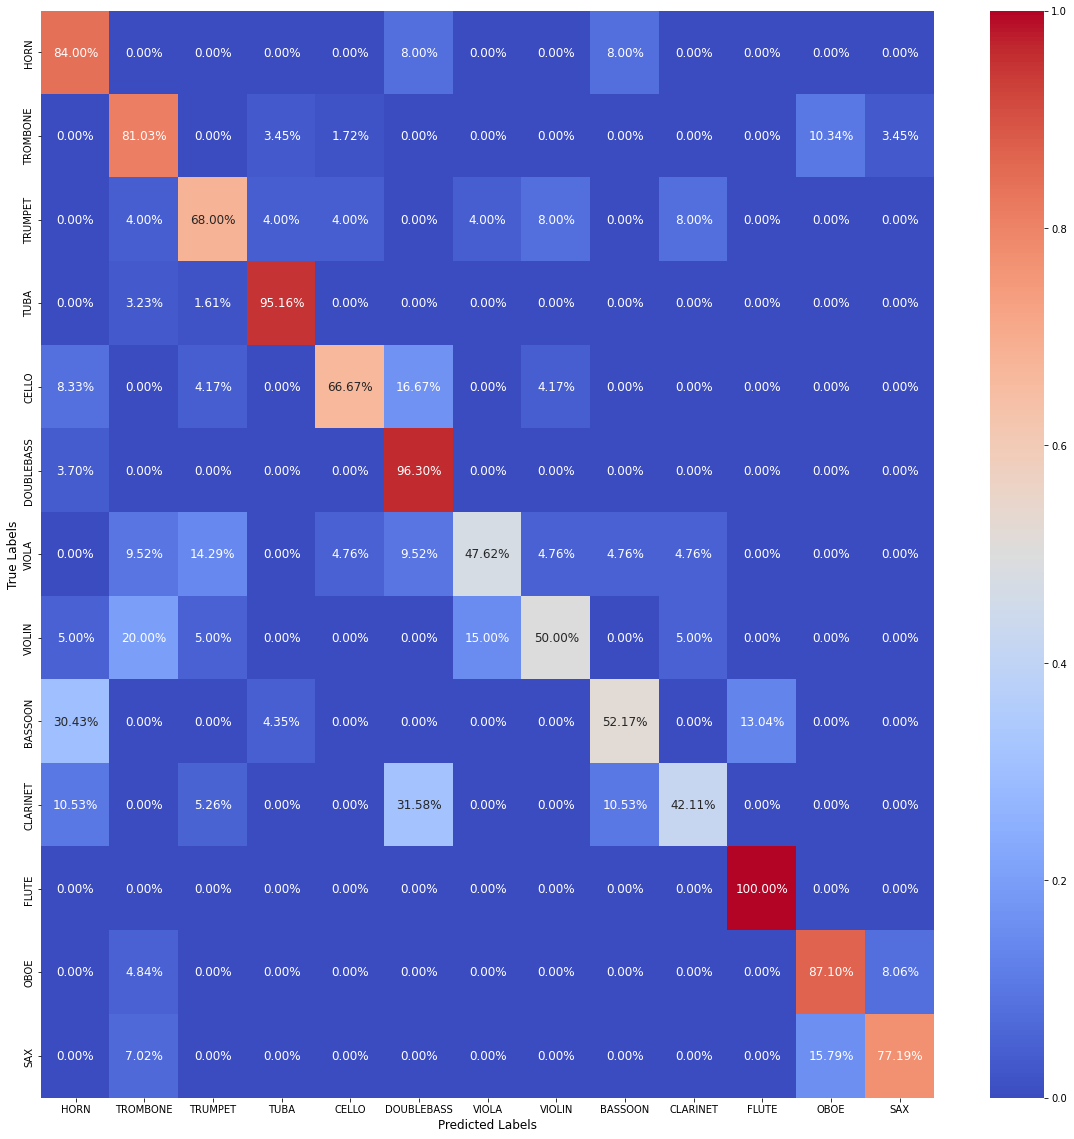

In [ ]:
model_evaluate(INPUT, PREDICTED_LABELS)